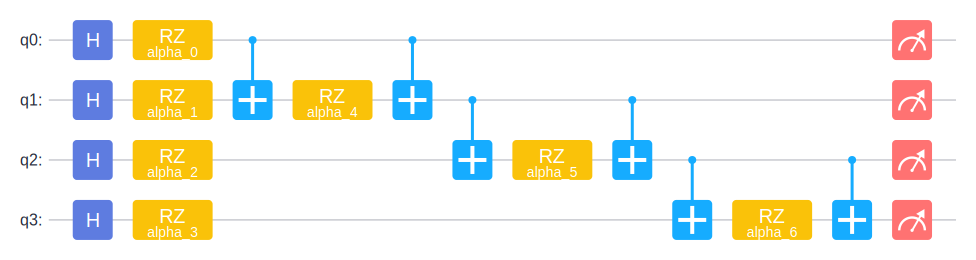

(0.796083798549056+0.6051864057360394j)¦1001⟩
shots: 10000
Keys: 3 2 1 0│0.00   0.017       0.034        0.05       0.067       0.084
─────────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
         0000│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         0001│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         0010│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         0011│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         0100│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         0101│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         0110│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
             │
         0111│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         1000│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         1001│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
             │
         1010│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒

In [3]:
from mindquantum.core.circuit import shift, add_suffix, Circuit, UN
from mindquantum.core.gates import RZ, X, H, Measure, BarrierGate, BARRIER
from IPython.display import display_svg
from mindquantum.simulator import Simulator 

# TODO: 请根据图中所示构建量子线路
circ = Circuit()  #初始化量子线路
template = Circuit([X.on(1, 0), RZ('alpha').on(1), X.on(1, 0)])   #将X,RZ,X三个量子门组合成一个template
circ = (UN(H, 4) + (RZ(f'alpha_{i}').on(i) for i in range(4)) + sum(add_suffix(shift(template, i), f'{i+4}') for i in range(3))
           + BarrierGate(False) + (Measure(f'{i}').on(i) for i in range(4)))  
#UN(H, 4) 是生成均匀叠加态，即对所有量子比特作用H门，(RZ(f'alpha_{i}').on(i) for i in range(4))是4个含参数的RZ门，sum(add_suffix(shift(template, i), f'{i+4}') for i in range(3))是添加三个template,
#BarrierGate(False)是添加barrier将线路对齐,False是指不打印出BarrierGate，(Measure(f'{i}').on(i) for i in range(4))是添加4个测量门
display_svg(circ.svg())   #绘制SVG格式的量子线路图片
#circ.summary()

# TODO: 使用模拟器运行线路，打印运行后的量子态
sim = Simulator("mqvector", circ.n_qubits) # 创建模拟器，backend使用‘projectq’，能模拟4个比特（'circ'线路中包含的比特数）
sim.apply_circuit(circ, {'alpha_0': 1.1, 'alpha_1': 2.6, 'alpha_2': 1.2,'alpha_3': 0.2,'alpha_4': 2,'alpha_5': 0.6,'alpha_6': 2.4})  #作用一个量子线路circ，当线路是一个参数化量子线路时，我们还需要提供参数值。
print(sim.get_qs(True)) #打印运行后的量子态

# TODO: 使用模拟器采样线路结果10000次
sim = Simulator('mqvector', circ.n_qubits)
res = sim.sampling(circ, {'alpha_0': 1.1, 'alpha_1': 2.6, 'alpha_2': 1.2,'alpha_3': 0.2,'alpha_4': 2,'alpha_5': 0.6,'alpha_6': 2.4}, shots=10000) #对量子线路进行10000次采样
print(res) #打印结果